In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('rocket')

# current_palette = sns.set_palette('rocket')
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=current_palette)
plt.rcParams['image.cmap'] = 'rocket'
# Set some styles for prettier plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

In [3]:
ds = pd.read_csv('datasets/cleaned/merged_fx_dataset.csv')

In [8]:
ds['Date'] = pd.to_datetime(ds['Date'])

In [9]:
# Resample to monthly, using end of month values for all columns
monthly_ds = ds.resample('M', on='Date').agg('last').reset_index()


/var/folders/pq/lv4328kx4fjg40sltdfjtrcm0000gn/T/ipykernel_62479/1514582956.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ds = ds.resample('M', on='Date').agg('last').reset_index()


In [10]:
monthly_ds

,Date,Buying,Selling,MidRate,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,Exports,GhGDP,USGDP,USInflationRate,USInterestRate
0,2008-01-31,0.9579,0.9804,0.9692,13.5,12.81,91.90,2174.50,891.00,12.1750,1979.3500,1674.3000,781.90,406.10,18863.43405,16843.003,87.093,3.22
1,2008-02-29,0.9619,0.9835,0.9727,13.5,13.21,94.50,2501.80,925.00,12.0160,2204.8800,1883.5000,868.90,444.10,18863.43405,16843.003,87.178,3.06
2,2008-03-31,0.9641,0.9852,0.9747,14.3,13.79,103.00,2614.20,965.90,12.1975,2017.7700,1712.9000,818.50,464.70,18863.43405,16843.003,87.349,2.51
3,2008-04-30,0.9752,0.9937,0.9845,14.3,15.29,110.40,2567.50,909.80,12.5625,2041.7500,1692.8000,940.00,521.90,17762.60476,16943.291,87.400,2.37
4,2008-05-31,0.9865,1.0082,0.9974,16.0,16.88,124.60,2647.00,889.90,13.2420,1823.8500,1513.2000,803.20,526.10,17762.60476,16943.291,87.559,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2024-08-31,15.1823,15.1975,15.1899,29.0,20.37,78.92,7409.50,2469.39,28.8400,2334.6253,4923.1327,1211.41,1736.92,48159.10000,23400.294,122.926,5.33
200,2024-09-30,15.7921,15.8079,15.8000,27.0,21.46,72.70,7646.70,2568.81,28.8400,2589.5872,5196.2110,1279.18,1670.25,48159.10000,23400.294,123.234,4.83
201,2024-10-31,16.2919,16.3082,16.3000,27.0,22.09,75.37,7273.57,2689.38,27.6900,2574.5379,5174.4780,1310.69,1671.92,53957.10000,23542.349,123.595,4.83
202,2024-11-30,15.2624,15.2776,15.2700,27.0,23.03,73.36,8105.00,2651.70,27.0300,2917.0162,5493.8590,1317.43,1936.45,53957.10000,23542.349,123.716,4.58


In [11]:
monthly_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              204 non-null    datetime64[ns]
 1   Buying            204 non-null    float64       
 2   Selling           204 non-null    float64       
 3   MidRate           204 non-null    float64       
 4   MPR               204 non-null    float64       
 5   GhInflationRate   204 non-null    float64       
 6   BrentOil          204 non-null    float64       
 7   Cocoa             204 non-null    float64       
 8   Gold              204 non-null    float64       
 9   GhInterestRate    204 non-null    float64       
 10  NetForeignAssets  204 non-null    float64       
 11  NIR               204 non-null    float64       
 12  Imports           204 non-null    float64       
 13  Exports           204 non-null    float64       
 14  GhGDP             204 non-

### SARIMA Z.ai

In [23]:
sd = pd.read_csv('datasets/cleaned/merged_fx_dataset.csv')
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4217 entries, 0 to 4216
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4217 non-null   object 
 1   Buying            4217 non-null   float64
 2   Selling           4217 non-null   float64
 3   MidRate           4217 non-null   float64
 4   MPR               4217 non-null   float64
 5   GhInflationRate   4217 non-null   float64
 6   BrentOil          4217 non-null   float64
 7   Cocoa             4217 non-null   float64
 8   Gold              4217 non-null   float64
 9   GhInterestRate    4217 non-null   float64
 10  NetForeignAssets  4217 non-null   float64
 11  NIR               4217 non-null   float64
 12  Imports           4217 non-null   float64
 13  Exports           4217 non-null   float64
 14  GhGDP             4217 non-null   float64
 15  USGDP             4217 non-null   float64
 16  USInflationRate   4217 non-null   float64


In [24]:
# Convert 'Date' column to datetime objects
sd['Date'] = pd.to_datetime(sd['Date'])

# Set 'Date' as the index, which is essential for time-series resampling
sd.set_index('Date', inplace=True)

In [16]:
sd.sort_index(inplace=True)

In [30]:
sd.drop(columns=['Selling', 'Buying'])

,MidRate,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,Exports,GhGDP,USGDP,USInflationRate,USInterestRate
Date,,,,,,,,,,,,,,,
2024-12-31,14.7000,27.0,23.82,73.18,10869.14,2641.45,27.030,3815.3387,6376.097,1266.31,1581.28,53957.10000,23542.349,123.980,4.33
2024-12-30,14.7100,27.0,23.82,73.18,10869.14,2641.45,27.030,3815.3387,6376.097,1266.31,1581.28,53957.10000,23542.349,123.980,4.33
2024-12-27,14.7000,27.0,23.82,73.18,10869.14,2641.45,27.030,3815.3387,6376.097,1266.31,1581.28,53957.10000,23542.349,123.980,4.33
2024-12-24,14.6500,27.0,23.82,73.18,10869.14,2641.45,27.030,3815.3387,6376.097,1266.31,1581.28,53957.10000,23542.349,123.980,4.33
2024-12-23,14.6500,27.0,23.82,73.18,10869.14,2641.45,27.030,3815.3387,6376.097,1266.31,1581.28,53957.10000,23542.349,123.980,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-08,0.9688,13.5,12.81,91.90,2174.50,891.00,12.175,1979.3500,1674.300,781.90,406.10,18863.43405,16843.003,87.093,4.27
2008-01-07,0.9680,13.5,12.81,91.90,2174.50,891.00,12.175,1979.3500,1674.300,781.90,406.10,18863.43405,16843.003,87.093,4.27
2008-01-04,0.9671,13.5,12.81,91.90,2174.50,891.00,12.175,1979.3500,1674.300,781.90,406.10,18863.43405,16843.003,87.093,4.18


In [31]:
print("Daily Data Head:")
print(sd.head())
print("\nDaily Data Info:")
sd.info()

Daily Data Head:
             Buying  Selling  MidRate   MPR  GhInflationRate  BrentOil  \
Date                                                                     
2024-12-31  14.6927  14.7074    14.70  27.0            23.82     73.18   
2024-12-30  14.7026  14.7174    14.71  27.0            23.82     73.18   
2024-12-27  14.6927  14.7074    14.70  27.0            23.82     73.18   
2024-12-24  14.6427  14.6573    14.65  27.0            23.82     73.18   
2024-12-23  14.6427  14.6573    14.65  27.0            23.82     73.18   

               Cocoa     Gold  GhInterestRate  NetForeignAssets       NIR  \
Date                                                                        
2024-12-31  10869.14  2641.45           27.03         3815.3387  6376.097   
2024-12-30  10869.14  2641.45           27.03         3815.3387  6376.097   
2024-12-27  10869.14  2641.45           27.03         3815.3387  6376.097   
2024-12-24  10869.14  2641.45           27.03         3815.3387  6376.097   
20

In [32]:
# --- Step 1: Downsample all features to their "true" monthly value ---
# We use .last() for most indicators to get the value at the end of the month.
# We use .mean() for the FX rate to get a representative value for the month.
# We use .sum() for imports/exports.
agg_dict = {
    'MidRate': 'mean',
    # 'Buying': 'last',
    # 'Selling': 'last',
    'MPR': 'last',
    'GhInflationRate': 'last',
    'BrentOil': 'last',
    'Cocoa': 'last',
    'Gold': 'last',
    'GhInterestRate': 'last',
    'NetForeignAssets': 'last',
    'NIR': 'last',
    'Imports': 'sum',
    'Exports': 'sum',
    'GhGDP': 'last',
    'USGDP': 'last',
    'USInflationRate': 'last',
    'USInterestRate': 'last'
}

df_monthly_true = sd.resample('M').agg(agg_dict)

# --- Step 2: Create a model-ready DataFrame by shifting low-frequency features ---
# This is the CRITICAL step to avoid lookahead bias.
# We shift the monthly features that are reported with a lag.
lag_features = [
    'GhInflationRate', 'USInflationRate', 'GhGDP', 'USGDP',
    'BrentOil', 'Cocoa', 'Gold', 'Imports', 'Exports',
    'NetForeignAssets', 'NIR'
]

df_monthly_model = df_monthly_true.copy()
df_monthly_model[lag_features] = df_monthly_true[lag_features].shift(1)

# --- Step 3: Clean up the final DataFrame ---
# The first month will have NaNs for the shifted features, so we drop it.
df_monthly_model.dropna(inplace=True)

# Rename columns to be more descriptive
df_monthly_model.rename(
    columns={'MidRate': 'MidRate_Monthly_Avg'}, inplace=True)

print("Model-Ready Monthly Data Head:")
df_monthly_model.head()

Model-Ready Monthly Data Head:


/var/folders/pq/lv4328kx4fjg40sltdfjtrcm0000gn/T/ipykernel_62479/2215265945.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_true = sd.resample('M').agg(agg_dict)


,MidRate_Monthly_Avg,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,Exports,GhGDP,USGDP,USInflationRate,USInterestRate
Date,,,,,,,,,,,,,,,
2008-02-29,0.971610,13.5,12.81,91.9,2174.5,891.0,12.0160,1979.35,1674.3,17201.8,8934.2,18863.43405,16843.003,87.093,3.06
2008-03-31,0.919772,14.3,13.21,94.5,2501.8,925.0,12.1975,2204.88,1883.5,17378.0,8882.0,18863.43405,16843.003,87.178,2.51
2008-04-30,0.978700,14.3,13.79,103.0,2614.2,965.9,12.5625,2017.77,1712.9,14733.0,8364.6,18863.43405,16843.003,87.349,2.37
2008-05-31,0.891995,16.0,15.29,110.4,2567.5,909.8,13.2420,2041.75,1692.8,20680.0,11481.8,17762.60476,16943.291,87.400,1.98
2008-06-30,1.010586,16.0,16.88,124.6,2647.0,889.9,14.5575,1823.85,1513.2,16064.0,10522.0,17762.60476,16943.291,87.559,2.47


In [33]:
df_monthly_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2008-02-29 to 2024-12-31
Freq: ME
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MidRate_Monthly_Avg  203 non-null    float64
 1   MPR                  203 non-null    float64
 2   GhInflationRate      203 non-null    float64
 3   BrentOil             203 non-null    float64
 4   Cocoa                203 non-null    float64
 5   Gold                 203 non-null    float64
 6   GhInterestRate       203 non-null    float64
 7   NetForeignAssets     203 non-null    float64
 8   NIR                  203 non-null    float64
 9   Imports              203 non-null    float64
 10  Exports              203 non-null    float64
 11  GhGDP                203 non-null    float64
 12  USGDP                203 non-null    float64
 13  USInflationRate      203 non-null    float64
 14  USInterestRate       203 non-null    float64
dtypes: float64(1

--- Verifying Release Lag ---
GhInflationRate used for Feb 2024 in our model: 23.52
True GhInflationRate for Jan 2024: 23.52
Match: True



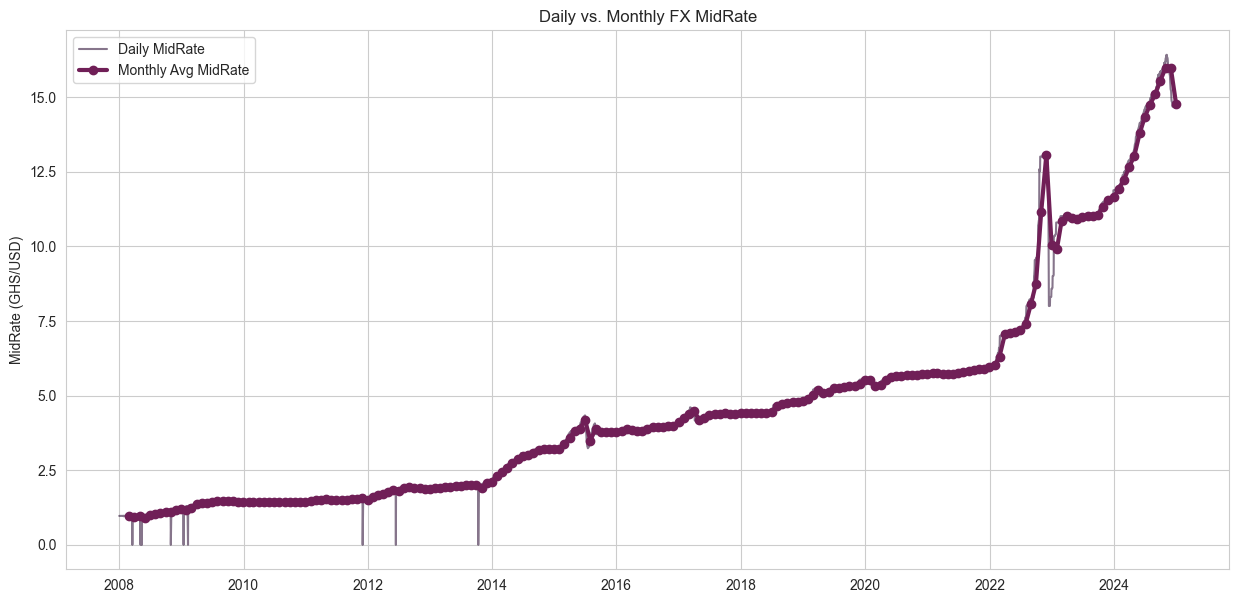

In [34]:
# --- Verification ---
# Let's check the inflation rate for February 2024 in our model-ready data.
# It should be the "true" value from January 2024.
inflation_feb_2024 = df_monthly_model.loc['2024-02-29', 'GhInflationRate']
inflation_jan_2024_true = df_monthly_true.loc['2024-01-31', 'GhInflationRate']

print(f"--- Verifying Release Lag ---")
print(f"GhInflationRate used for Feb 2024 in our model: {inflation_feb_2024}")
print(f"True GhInflationRate for Jan 2024: {inflation_jan_2024_true}")
print(f"Match: {inflation_feb_2024 == inflation_jan_2024_true}\n")


# --- Visualization ---
# Plot the daily vs. monthly MidRate to see the effect of downsampling
plt.figure(figsize=(15, 7))
plt.plot(sd['MidRate'], label='Daily MidRate', alpha=0.6)
plt.plot(df_monthly_model['MidRate_Monthly_Avg'],
         label='Monthly Avg MidRate', linewidth=3, marker='o')
plt.title('Daily vs. Monthly FX MidRate')
plt.ylabel('MidRate (GHS/USD)')
plt.legend()
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                MidRate_Monthly_Avg   No. Observations:                  179
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -46.231
Date:                            Fri, 17 Oct 2025   AIC                            130.462
Time:                                    11:36:03   BIC                            187.916
Sample:                                02-29-2008   HQIC                           153.802
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
MPR                  0.1540      0.064      2.406      0.016       0.029       0.279
GhInflationRate  

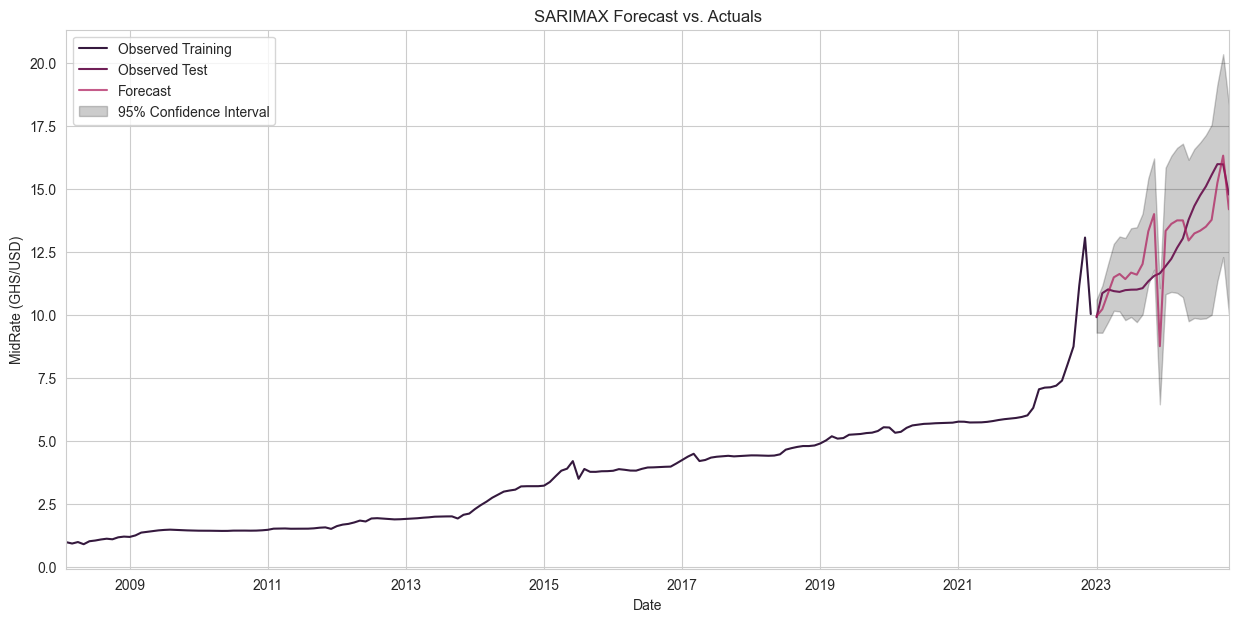

In [35]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Assume df_monthly_model is the DataFrame we created in the previous step

# --- 1. Define Train and Test Sets ---
# Let's hold out the last 24 months (2 years) for testing
train = df_monthly_model.iloc[:-24]
test = df_monthly_model.iloc[-24:]

# Define the target and exogenous features
target_train = train['MidRate_Monthly_Avg']
exog_train = train.drop('MidRate_Monthly_Avg', axis=1)

target_test = test['MidRate_Monthly_Avg']
exog_test = test.drop('MidRate_Monthly_Avg', axis=1)


# --- 2. Build and Fit the SARIMAX Model ---
# The order (p,d,q) and seasonal_order (P,D,Q,s) need to be tuned.
# A common starting point for monthly data is (1,1,1) and (1,1,1,12).
# You would use AIC/BIC or grid search to find the best parameters.
model = sm.tsa.statespace.SARIMAX(target_train,
                                  exog=exog_train,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit(disp=False)  # disp=False suppresses output
print(results.summary())


# --- 3. Make Predictions ---
# Use the model to predict on the test set, providing the exogenous variables for that period
predictions = results.get_prediction(
    start=test.index[0], end=test.index[-1], exog=exog_test)
pred_mean = predictions.predicted_mean


# --- 4. Evaluate the Model ---
mae = mean_absolute_error(target_test, pred_mean)
print(f'\nMean Absolute Error on Test Set: {mae:.4f}')


# --- 5. Visualize the Results ---
ax = target_train.plot(label='Observed Training', figsize=(15, 7))
target_test.plot(ax=ax, label='Observed Test')
pred_mean.plot(ax=ax, label='Forecast', alpha=0.7)

ax.fill_between(predictions.conf_int().index,
                predictions.conf_int().iloc[:, 0],
                predictions.conf_int().iloc[:, 1], color='k', alpha=0.2, label='95% Confidence Interval')

ax.set_xlabel('Date')
ax.set_ylabel('MidRate (GHS/USD)')
ax.set_title('SARIMAX Forecast vs. Actuals')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R2 score
r2 = r2_score(target_test, pred_mean)
print(f'R2 Score on Test Set: {r2:.4f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(target_test, pred_mean))
print(f'Root Mean Squared Error on Test Set: {rmse:.4f}')


R2 Score on Test Set: 0.5540
Root Mean Squared Error on Test Set: 1.2531


### XGBoost

In [52]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [41]:
df_monthly_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2008-02-29 to 2024-12-31
Freq: ME
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MidRate_Monthly_Avg  203 non-null    float64
 1   MPR                  203 non-null    float64
 2   GhInflationRate      203 non-null    float64
 3   BrentOil             203 non-null    float64
 4   Cocoa                203 non-null    float64
 5   Gold                 203 non-null    float64
 6   GhInterestRate       203 non-null    float64
 7   NetForeignAssets     203 non-null    float64
 8   NIR                  203 non-null    float64
 9   Imports              203 non-null    float64
 10  Exports              203 non-null    float64
 11  GhGDP                203 non-null    float64
 12  USGDP                203 non-null    float64
 13  USInflationRate      203 non-null    float64
 14  USInterestRate       203 non-null    float64
dtypes: float64(1

In [87]:
# This is the most critical step for tree-based models
def create_features(df, target_variable='MidRate_Monthly_Avg'):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['day_of_month'] = df.index.day
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year

    # Create lag features
    for i in range(1, 4):  # Lags for the past 3 months
        df[f'lag_{i}'] = df[target_variable].shift(i)

    # Create rolling window features
    df['rolling_mean_3'] = df[target_variable].rolling(window=3).mean()
    df['rolling_std_3'] = df[target_variable].rolling(window=3).std()

    # Add lag features for key external regressors
    df['lag_BrentOil_1'] = df['BrentOil'].shift(1)
    df['lag_GhInflationRate_1'] = df['GhInflationRate'].shift(1)

    return df

In [60]:
def create_features_debug(df, target_variable='MidRate_Monthly_Avg'):
    """
    A more robust feature creation function for debugging.
    """
    df = df.copy()
    # Defensive check: ensure the index is sorted
    df.sort_index(inplace=True)

    # --- START SIMPLE: ONLY CREATE THE MOST BASIC LAG ---
    # We will start with ONLY the 1-month lag of the target
    df['lag_1'] = df[target_variable].shift(1)

    # We will comment out all other features for now
    # df['dayofmonth'] = df.index.day
    # df['quarter'] = df.index.quarter
    # df['month'] = df.index.month
    # df['year'] = df.index.year
    # for i in range(2, 4): df[f'lag_{i}'] = df[target_variable].shift(i)
    # df['rolling_mean_3'] = df[target_variable].rolling(window=3).mean()
    # df['rolling_std_3'] = df[target_variable].rolling(window=3).std()
    # df['lag_BrentOil_1'] = df['BrentOil'].shift(1)
    # df['lag_GhInflationRate_1'] = df['GhInflationRate'].shift(1)

    return df

In [88]:
df_featured = create_features(df_monthly_model)

# Drop rows with NaN values created by lags and rolling windows
df_featured.dropna(inplace=True)

In [89]:
print("Featured Data Head:")
df_featured.head()

Featured Data Head:


,MidRate_Monthly_Avg,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,...,quarter,month,year,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3,lag_BrentOil_1,lag_GhInflationRate_1
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-31,0.891995,16.0,15.29,110.4,2567.5,909.8,13.2420,2041.75,1692.8,20680.0,...,2,5,2008,0.978700,0.919772,0.971610,0.930156,0.044275,103.0,13.79
2008-06-30,1.010586,16.0,16.88,124.6,2647.0,889.9,14.5575,1823.85,1513.2,16064.0,...,2,6,2008,0.891995,0.978700,0.919772,0.960427,0.061371,110.4,15.29
2008-07-31,1.038714,17.0,18.41,133.5,3071.2,891.8,15.4775,1812.34,1458.7,16718.1,...,3,7,2008,1.010586,0.891995,0.978700,0.980431,0.077869,124.6,16.88
2008-08-31,1.080333,17.0,18.31,134.8,2928.5,938.5,17.3900,1443.69,1118.9,21901.0,...,3,8,2008,1.038714,1.010586,0.891995,1.043211,0.035091,133.5,18.41
2008-09-30,1.111062,17.0,18.10,115.2,2771.3,835.9,19.0950,1854.59,1538.0,20727.0,...,3,9,2008,1.080333,1.038714,1.010586,1.076703,0.036311,134.8,18.31


In [ ]:
# Let's hold out the last 24 months (2 years) for testing
train_size = len(df_featured) - 24
train = df_featured.iloc[:train_size]
test = df_featured.iloc[train_size:]


# create anther set of data for evaluation of the xgb model
# Let's hold out the last 12 months for a secondary evaluation set
eval_size = 12
eval_start = len(df_featured) - eval_size

# Make sure the eval set does not overlap with the main test set
eval_set = df_featured.iloc[eval_start:]
main_train = df_featured.iloc[:eval_start]

# # Optionally, unpack features and target for this eval set


In [100]:
eval_set

,MidRate_Monthly_Avg,MPR,GhInflationRate,BrentOil,Cocoa,Gold,GhInterestRate,NetForeignAssets,NIR,Imports,...,quarter,month,year,lag_1,lag_2,lag_3,rolling_mean_3,rolling_std_3,lag_BrentOil_1,lag_GhInflationRate_1
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-31,11.934448,29.0,23.19,77.26,4235.60,2035.43,29.93,677.831327,3191.561711,20765.70,...,1,1,2024,11.651117,11.549359,11.335382,11.711641,0.199551,82.02,26.41
2024-02-29,12.230071,29.0,23.52,79.15,4456.86,2032.41,29.19,1088.580300,3597.478610,28884.87,...,1,2,2024,11.934448,11.651117,11.549359,11.938545,0.289499,77.26,23.19
2024-03-31,12.667432,29.0,23.18,81.71,5712.95,2025.73,28.48,1041.432300,3539.247759,23423.40,...,1,3,2024,12.230071,11.934448,11.651117,12.277317,0.368769,79.15,23.52
2024-04-30,13.038060,29.0,25.79,84.74,7485.40,2158.22,28.68,1336.180700,3855.021854,23290.20,...,2,4,2024,12.667432,12.230071,11.934448,12.645188,0.404453,81.71,23.18
2024-05-31,13.782323,29.0,25.04,89.00,10116.86,2334.16,28.74,1449.766200,3991.849031,26742.00,...,2,5,2024,13.038060,12.667432,12.230071,13.162605,0.567784,84.74,25.79
2024-06-30,14.329779,29.0,23.15,83.00,8121.77,2350.81,28.80,1531.890200,4078.702542,29063.98,...,2,6,2024,13.782323,13.038060,12.667432,13.716721,0.648353,89.00,25.04
2024-07-31,14.746735,29.0,22.75,83.01,9022.58,2325.34,28.83,1971.687700,4500.587470,21392.67,...,3,7,2024,14.329779,13.782323,13.038060,14.286279,0.483675,83.00,23.15
2024-08-31,15.103657,29.0,20.95,83.88,7994.68,2391.63,28.84,2223.747100,4783.706500,34632.02,...,3,8,2024,14.746735,14.329779,13.782323,14.726724,0.387327,83.01,22.75
2024-09-30,15.557485,27.0,20.37,78.92,7409.50,2469.39,28.84,2334.625300,4923.132700,25439.61,...,3,9,2024,15.103657,14.746735,14.329779,15.135959,0.406339,83.88,20.95


In [92]:
# Define X (features) and y (target)
FEATURES = [col for col in df_featured.columns if col != 'MidRate_Monthly_Avg']
# FEATURES = ['lag_1']
TARGET = 'MidRate_Monthly_Avg'

In [93]:
x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = test[TARGET]

In [101]:
x_eval = eval_set[FEATURES]
y_eval = eval_set[TARGET]

In [94]:
# Use XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    objective='reg:squarederror',  # Use squared error for regression
    early_stopping_rounds=50,  # Stop if performance doesn't improve
    # Evaluate on test set for early stopping
    verbose=False  # Suppress output
)

In [102]:
# xgb_model.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)])
xgb_model.fit(
    x_train, y_train,
    eval_set=[(x_eval, y_eval)],
    verbose=False
)

/Users/dela/Developer/thesis/.venv/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [13:30:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [103]:
y_pred = xgb_model.predict(x_test)

In [106]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = root_mean_squared_error(y_test, y_pred)

In [107]:
metrics_df = pd.DataFrame({
    'R2 Score': [r2],
    'MAE': [mae],
    'RMSE': [mse]
})
display(metrics_df)


,R2 Score,MAE,RMSE
0,-11.676531,6.10937,6.680463


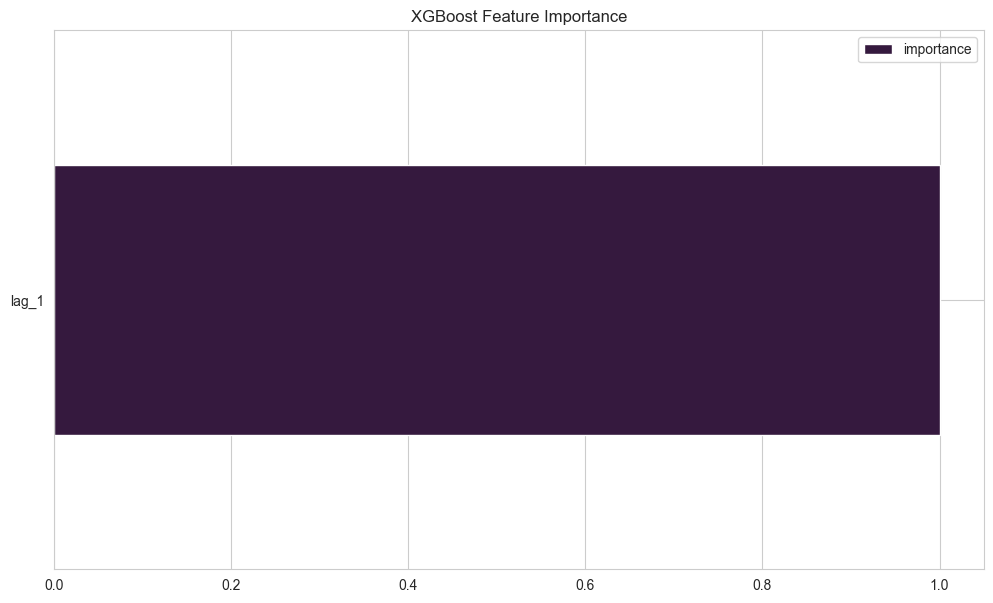

In [85]:
fi = pd.DataFrame(data=xgb_model.feature_importances_,
                  index=xgb_model.get_booster().feature_names,
                  columns=['importance'])
fi.sort_values('importance').tail(15).plot(kind='barh', figsize=(12, 7))
plt.title('XGBoost Feature Importance')
plt.show()

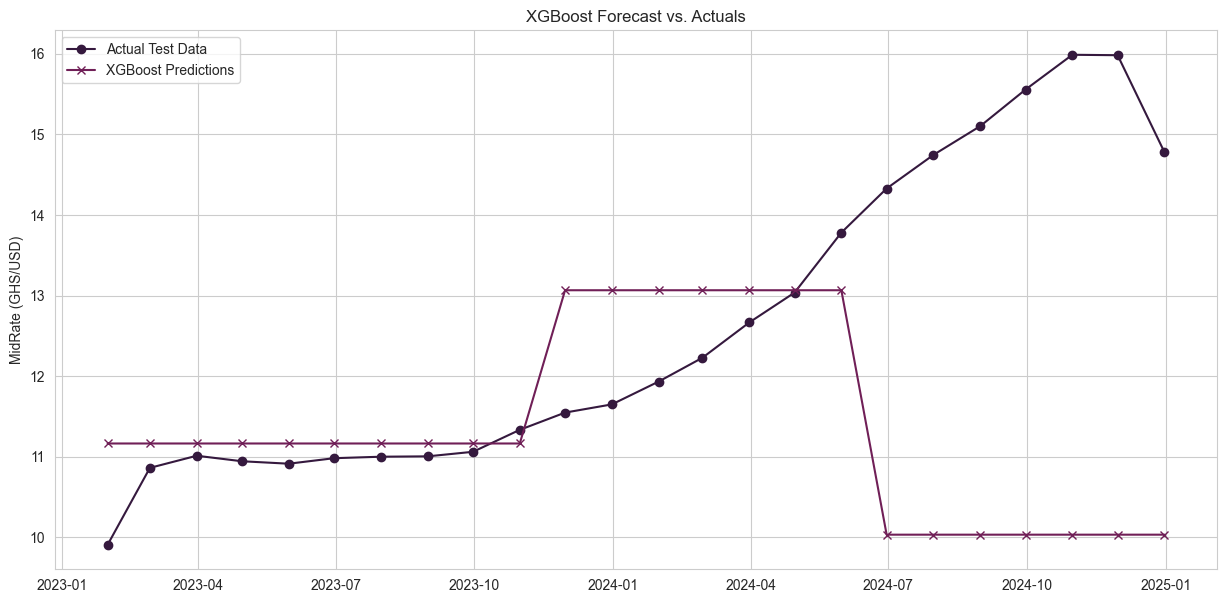

In [86]:
# Plot actuals vs. predictions
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='Actual Test Data', marker='o')
plt.plot(y_test.index, y_pred, label='XGBoost Predictions', marker='x')
plt.title('XGBoost Forecast vs. Actuals')
plt.ylabel('MidRate (GHS/USD)')
plt.legend()
plt.show()

Debugging DataFrame Head (only lag_1):
            MidRate_Monthly_Avg   MPR  GhInflationRate  BrentOil   Cocoa  \
Date                                                                       
2008-03-31             0.919772  14.3            13.21      94.5  2501.8   
2008-04-30             0.978700  14.3            13.79     103.0  2614.2   
2008-05-31             0.891995  16.0            15.29     110.4  2567.5   
2008-06-30             1.010586  16.0            16.88     124.6  2647.0   
2008-07-31             1.038714  17.0            18.41     133.5  3071.2   

             Gold  GhInterestRate  NetForeignAssets     NIR  Imports  Exports  \
Date                                                                            
2008-03-31  925.0         12.1975           2204.88  1883.5  17378.0   8882.0   
2008-04-30  965.9         12.5625           2017.77  1712.9  14733.0   8364.6   
2008-05-31  909.8         13.2420           2041.75  1692.8  20680.0  11481.8   
2008-06-30  889.9      

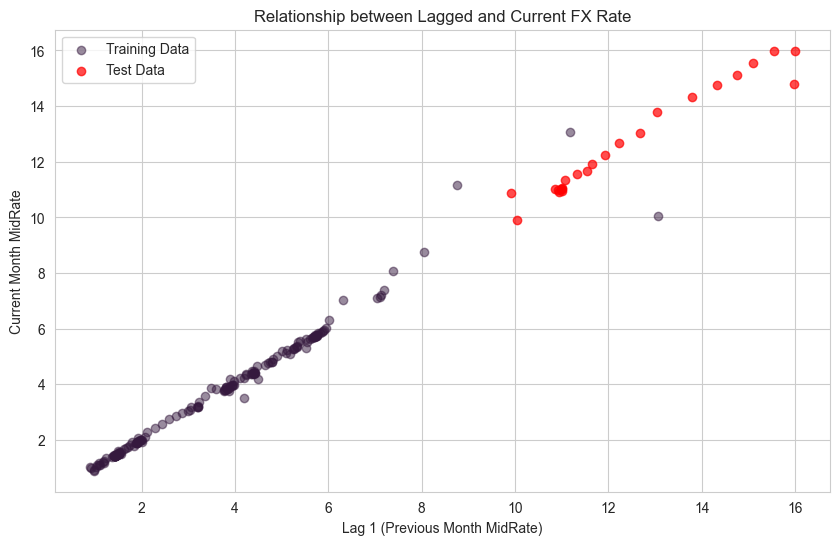

In [108]:
import xgboost as xgb
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_monthly_model is the DataFrame we created earlier

# --- A "Bulletproof" Feature Engineering and Prep Function ---


def create_features_debug(df, target_variable='MidRate_Monthly_Avg'):
    """
    A more robust feature creation function for debugging.
    """
    df = df.copy()
    # Defensive check: ensure the index is sorted
    df.sort_index(inplace=True)

    # --- START SIMPLE: ONLY CREATE THE MOST BASIC LAG ---
    # We will start with ONLY the 1-month lag of the target
    df['lag_1'] = df[target_variable].shift(1)

    # We will comment out all other features for now
    # df['dayofmonth'] = df.index.day
    # df['quarter'] = df.index.quarter
    # df['month'] = df.index.month
    # df['year'] = df.index.year
    # for i in range(2, 4): df[f'lag_{i}'] = df[target_variable].shift(i)
    # df['rolling_mean_3'] = df[target_variable].rolling(window=3).mean()
    # df['rolling_std_3'] = df[target_variable].rolling(window=3).std()
    # df['lag_BrentOil_1'] = df['BrentOil'].shift(1)
    # df['lag_GhInflationRate_1'] = df['GhInflationRate'].shift(1)

    return df


# --- Step 1: Create a minimal feature set ---
df_featured_debug = create_features_debug(df_monthly_model)
df_featured_debug.dropna(inplace=True)

print("Debugging DataFrame Head (only lag_1):")
print(df_featured_debug.head())

# --- Step 2: Define Train and Test Sets ---
train_size = len(df_featured_debug) - 24
train = df_featured_debug.iloc[:train_size]
test = df_featured_debug.iloc[train_size:]

# Define X and y for this simple model
FEATURES_DEBUG = ['lag_1']  # ONLY use the lag_1 feature
TARGET = 'MidRate_Monthly_Avg'

X_train = train[FEATURES_DEBUG]
y_train = train[TARGET]

X_test = test[FEATURES_DEBUG]
y_test = test[TARGET]

# --- Step 3: Train a Simple Model ---
print("\nTraining a model with ONLY 'lag_1'...")
simple_model = xgb.XGBRegressor(
    n_estimators=100,  # Use fewer trees for a quick check
    learning_rate=0.1,
    objective='reg:squarederror'
)

simple_model.fit(X_train, y_train)

# --- Step 4: Evaluate the Simple Model ---
y_pred_simple = simple_model.predict(X_test)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"\n--- Simple Model Performance ---")
print(f"R² with only 'lag_1': {r2_simple:.4f}")

# --- Step 5: Analyze the Result ---
if r2_simple < 0:
    print("\nPROBLEM IDENTIFIED: Even the simplest model fails.")
    print("The issue is likely in the data preparation or a severe concept drift.")
    print("Let's visualize the relationship between lag_1 and the target.")

    plt.figure(figsize=(10, 6))
    plt.scatter(train['lag_1'], train[TARGET],
                alpha=0.5, label='Training Data')
    plt.scatter(test['lag_1'], test[TARGET], alpha=0.7,
                color='red', label='Test Data')
    plt.xlabel('Lag 1 (Previous Month MidRate)')
    plt.ylabel('Current Month MidRate')
    plt.title('Relationship between Lagged and Current FX Rate')
    plt.legend()
    plt.show()

else:
    print("\nSimple model works! The problem is one of the more complex features.")
    print("You can now systematically add features back one by one to find the culprit.")
    # For example, next you would add 'lag_2', then 'lag_3', then a rolling mean, etc.

In [109]:
r2_simple

-1.3608446498830045

In [110]:
def create_features_debug(df, target_variable='MidRate_Monthly_Avg'):
    """
    A more robust feature creation function for debugging.
    """
    df = df.copy()
    # Defensive check: ensure the index is sorted
    df.sort_index(inplace=True)

    # --- START SIMPLE: ONLY CREATE THE MOST BASIC LAG ---
    # We will start with ONLY the 1-month lag of the target
    df['lag_1'] = df[target_variable].shift(1)

    # We will comment out all other features for now
    # df['dayofmonth'] = df.index.day
    # df['quarter'] = df.index.quarter
    # df['month'] = df.index.month
    # df['year'] = df.index.year
    # for i in range(2, 4): df[f'lag_{i}'] = df[target_variable].shift(i)
    # df['rolling_mean_3'] = df[target_variable].rolling(window=3).mean()
    # df['rolling_std_3'] = df[target_variable].rolling(window=3).std()
    # df['lag_BrentOil_1'] = df['BrentOil'].shift(1)
    # df['lag_GhInflationRate_1'] = df['GhInflationRate'].shift(1)

    return df


# --- Step 1: Create a minimal feature set ---
df_featured_debug = create_features_debug(df_monthly_model)
df_featured_debug.dropna(inplace=True)

print("Debugging DataFrame Head (only lag_1):")
print(df_featured_debug.head())

# --- Strategy 1: Train on More Recent Data ---

# Use the same df_featured_debug DataFrame from before
# But this time, we'll define our train/test split differently
# Let's use the last 5 years (60 months) for training
train_cutoff_date = df_featured_debug.index.max() - pd.DateOffset(months=24 +
                                                                  60)  # 60 months train, 24 months test

train_recent = df_featured_debug[df_featured_debug.index <= train_cutoff_date]
test_recent = df_featured_debug[df_featured_debug.index > train_cutoff_date]

print(
    f"Training on data from: {train_recent.index.min().date()} to {train_recent.index.max().date()}")
print(
    f"Testing on data from:  {test_recent.index.min().date()} to {test_recent.index.max().date()}")

# Define X and y for this recent model
X_train_recent = train_recent[FEATURES_DEBUG]
y_train_recent = train_recent[TARGET]

X_test_recent = test_recent[FEATURES_DEBUG]
y_test_recent = test_recent[TARGET]

# Train the model on the recent data
recent_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    objective='reg:squarederror'
)

recent_model.fit(X_train_recent, y_train_recent)

# Evaluate the recent model
y_pred_recent = recent_model.predict(X_test_recent)
r2_recent = r2_score(y_test_recent, y_pred_recent)

print(f"\n--- Recent-Only Model Performance ---")
print(f"R² trained on last 5 years: {r2_recent:.4f}")

Debugging DataFrame Head (only lag_1):
            MidRate_Monthly_Avg   MPR  GhInflationRate  BrentOil   Cocoa  \
Date                                                                       
2008-03-31             0.919772  14.3            13.21      94.5  2501.8   
2008-04-30             0.978700  14.3            13.79     103.0  2614.2   
2008-05-31             0.891995  16.0            15.29     110.4  2567.5   
2008-06-30             1.010586  16.0            16.88     124.6  2647.0   
2008-07-31             1.038714  17.0            18.41     133.5  3071.2   

             Gold  GhInterestRate  NetForeignAssets     NIR  Imports  Exports  \
Date                                                                            
2008-03-31  925.0         12.1975           2204.88  1883.5  17378.0   8882.0   
2008-04-30  965.9         12.5625           2017.77  1712.9  14733.0   8364.6   
2008-05-31  909.8         13.2420           2041.75  1692.8  20680.0  11481.8   
2008-06-30  889.9      

In [111]:
# --- Step 3: Full Feature Set on Recent Data ---

# Go back to our original, full feature set
# Use the original function with all features
df_featured_full = create_features(df_monthly_model)
df_featured_full.dropna(inplace=True)

# Redefine the recent data split
train_cutoff_date = df_featured_full.index.max() - pd.DateOffset(months=24 + 60)
train_full = df_featured_full[df_featured_full.index <= train_cutoff_date]
test_full = df_featured_full[df_featured_full.index > train_cutoff_date]

# Define X and y using ALL features
FEATURES_FULL = [
    col for col in df_featured_full.columns if col != 'MidRate_Monthly_Avg']
TARGET = 'MidRate_Monthly_Avg'

X_train_full = train_full[FEATURES_FULL]
y_train_full = train_full[TARGET]

X_test_full = test_full[FEATURES_FULL]
y_test_full = test_full[TARGET]

# Train a full model on recent data
full_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    objective='reg:squarederror'
)

full_model.fit(X_train_full, y_train_full)

# Evaluate the full model
y_pred_full = full_model.predict(X_test_full)
r2_full = r2_score(y_test_full, y_pred_full)

print(f"\n--- Full Feature Model Performance (on recent data) ---")
print(f"R² with all features (last 5 years): {r2_full:.4f}")


--- Full Feature Model Performance (on recent data) ---
R² with all features (last 5 years): -1.3061
